In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from fbprophet import Prophet

import os
print(os.listdir("./EPA_DATA"))

ModuleNotFoundError: No module named 'fbprophet'

In [3]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [67]:
# dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors = 'coerce')
# df = pd.read_csv("./EPA_DATA/gases_aggregation.csv", parse_dates=['year_month'], index_col='year_month', date_parser=dateparse) 

df = pd.read_csv('./EPA_DATA/gases_aggregation.csv',encoding= 'unicode_escape',index_col='year_month', parse_dates=['year_month'])


In [69]:
co_data = df[df.County_Name=='Sacramento'].sort_values(by=['year_month'])[['CO']]
co_data

,CO
year_month,
1980-01-01,1.134529
1980-02-01,0.974255
1980-03-01,0.611695
1980-04-01,0.520621
1980-05-01,0.454460
...,...
2019-02-01,0.308275
2019-03-01,0.338854
2019-04-01,0.264309


In [70]:
pred_data = co_data.reset_index().rename(columns={'year_month':'ds','CO':'y'})

In [95]:
split_date = '01-Jan-2015'
pjme_train = co_data.copy()
pjme_test = co_data.loc[co_data.index > split_date].copy()


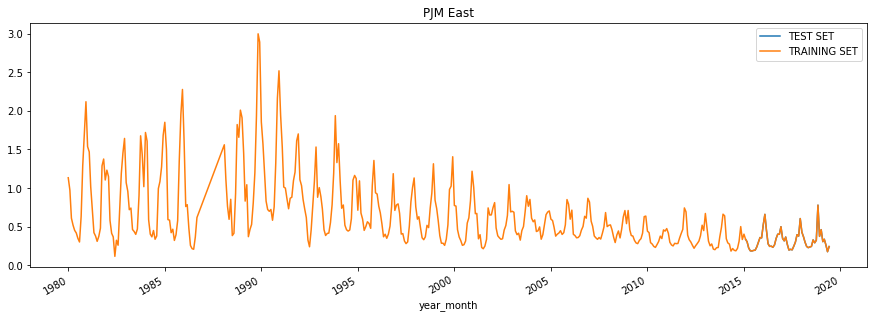

In [96]:
# Plot train and test so you can see where we have split
pjme_test \
    .rename(columns={'CO': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'CO': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='PJM East', style='-')
plt.show()

In [97]:
# Format data for prophet model using ds and y
pjme_train.reset_index() \
    .rename(columns={'year_month':'ds',
                     'CO':'y'}).head()

,ds,y
0,1980-01-01,1.134529
1,1980-02-01,0.974255
2,1980-03-01,0.611695
3,1980-04-01,0.520621
4,1980-05-01,0.454460


In [1]:
# Setup and train model and fit
model = Prophet(seasonality_mode='multiplicative', mcmc_samples=300)
model.fit(pjme_train.reset_index() \
              .rename(columns={'year_month':'ds',
                               'CO':'y'}))

NameError: name 'Prophet' is not defined

In [199]:
# Predict on training set with model
pjme_test_fcst = model.predict(df=pjme_test.reset_index() \
                                   .rename(columns={'year_month':'ds'}))

In [200]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-02-01,0.315905,0.176099,0.655763,0.297166,0.334240,0.291928,0.235475,0.352767,0.291928,0.235475,0.352767,0.0,0.0,0.0,0.408126
1,2015-03-01,0.315062,0.086746,0.528490,0.296168,0.333580,-0.047416,-0.142945,0.040071,-0.047416,-0.142945,0.040071,0.0,0.0,0.0,0.300123
2,2015-04-01,0.314130,0.002593,0.471531,0.295125,0.332763,-0.253145,-0.339744,-0.165873,-0.253145,-0.339744,-0.165873,0.0,0.0,0.0,0.234610
3,2015-05-01,0.313228,-0.058498,0.410139,0.294171,0.332019,-0.453130,-0.548608,-0.355750,-0.453130,-0.548608,-0.355750,0.0,0.0,0.0,0.171295
4,2015-06-01,0.312296,-0.077499,0.350962,0.293191,0.331289,-0.568102,-0.655956,-0.482210,-0.568102,-0.655956,-0.482210,0.0,0.0,0.0,0.134880


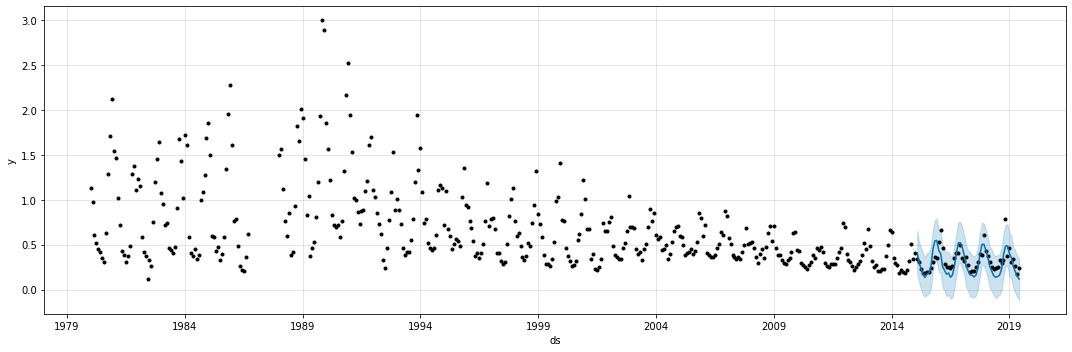

In [201]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst,
                 ax=ax)
plt.show()

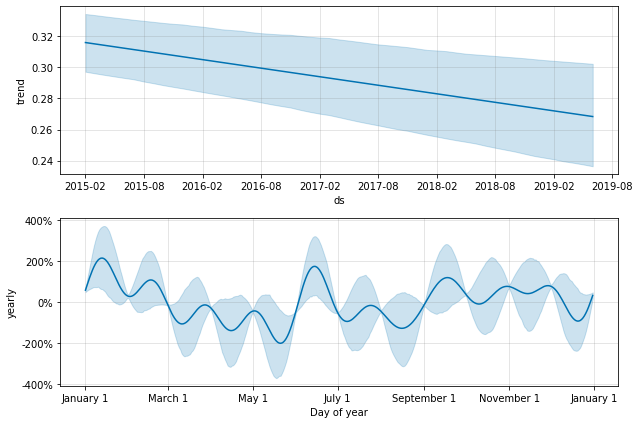

In [202]:
fig = model.plot_components(pjme_test_fcst)


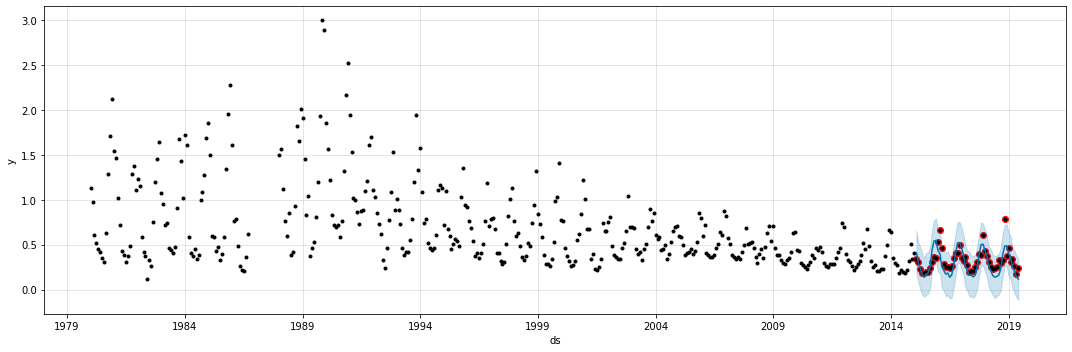

In [203]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['CO'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

In [205]:
future = model.make_future_dataframe(periods=200, freq='M')
future.tail()


,ds
654,2035-09-30
655,2035-10-31
656,2035-11-30
657,2035-12-31
658,2036-01-31


In [206]:
forecast = model.predict(future)


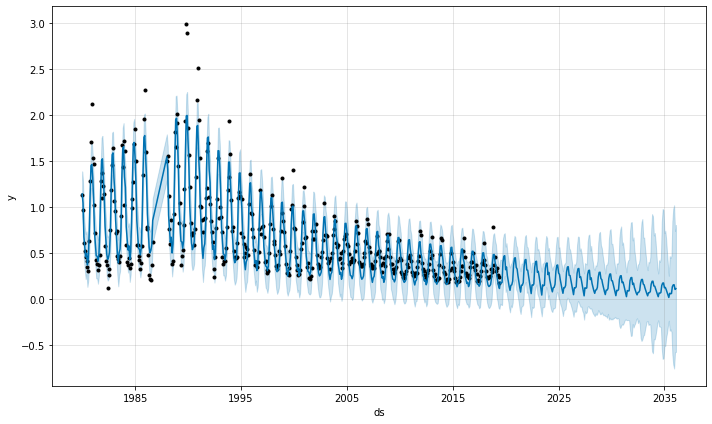

In [207]:
fig1 = model.plot(forecast)


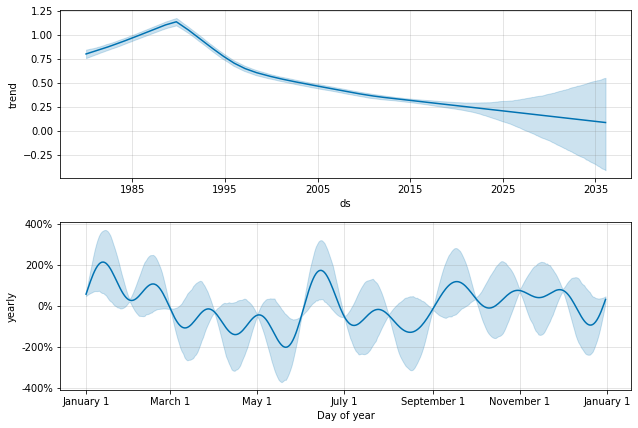

In [208]:
fig2 = model.plot_components(forecast)
